<h1> Processing and Visualisation of results </h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [5]:
hto_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Results-cluster/HTODemux/resultHTO.csv")

In [6]:
hto_results.columns = ["hashtag","classification"]

In [7]:
hto_results.head()

,hashtag,classification
0,AAACCCAAGGTGTGAC-1,Doublet
1,AAACCCAGTGAGAGGG-1,Singlet
2,AAACGAAAGAATCTAG-1,Doublet
3,AAACGAACACATATGC-1,Doublet
4,AAACGAACACGACTAT-1,Doublet


In [5]:
ids = hto_results['hashtag'].value_counts()
ids

AAACCCAAGGTGTGAC-1    1
GTCACTCTCCACTGGG-1    1
GTCATCCCACTACCGG-1    1
GTCATCCAGTGATTCC-1    1
GTCAGCGTCACGACTA-1    1
                     ..
CCCTAACCAATTGCAC-1    1
CCCTAACAGGCATCGA-1    1
CCCTAACAGGATTTGA-1    1
CCCTAACAGGATGAGA-1    1
TTTGTTGTCGCTTAAG-1    1
Name: hashtag, Length: 4878, dtype: int64

In [6]:
htoDemul = hto_results['classification'].value_counts()

In [7]:
htoDemul_dict = htoDemul.to_dict()


In [8]:
htoDemul_dict['Algorithm'] = "HTODemul"
htoDemul_dict

{'Doublet': 3086, 'Singlet': 1149, 'Negative': 643, 'Algorithm': 'HTODemul'}

In [17]:
multi_results = pd.read_csv("/Users/mylenemarianagonzalesandre/Development/Bachelor-Thesis/demultiplex-pipeline/results/multiseq-result.csv")

In [18]:
multi_results.columns = ["hashtag","classification"]

In [19]:
multi_results

,hashtag,classification
0,AGGCCACAGCGTCTAT,HTO-H
1,ATTGGTGAGTTCGCAT,Doublet
2,GTGCAGCTCAGTCCCT,HTO-H
3,TAGTTGGGTCATACTG,HTO-H
4,TTCTTAGAGAAGGCCT,HTO-D
...,...,...
16911,AGCGTCGAGTGGGATC,Doublet
16912,AACACGTGTAGCCTCG,Doublet
16913,AGCGTCGAGGGCTTCC,Doublet
16914,GTCGGGTAGCATGGCA,Doublet


In [20]:
multiseq = multi_results['classification'].value_counts()

In [21]:
multiseq

Doublet    5633
HTO-D      1703
HTO-B      1668
HTO-G      1572
HTO-H      1434
HTO-E      1268
HTO-C      1253
HTO-F      1235
HTO-A      1150
Name: classification, dtype: int64

In [22]:
ids_2 = multi_results['hashtag'].value_counts()
ids_2

AGGCCACAGCGTCTAT    1
TGGGCGTGTTATCCGA    1
ATTACTCGTCTTGATG    1
CAGCTAACACAGCGTC    1
GACGTGCGTTTCCACC    1
                   ..
CCTAGCTTCTGCTGCT    1
GTGTGCGGTTTGTTTC    1
CCTTACGCAACACGCC    1
CCGGTAGGTGCAGACA    1
AGCGTCGGTCCAGTAT    1
Name: hashtag, Length: 16916, dtype: int64

In [36]:
multiseq_res_dict = multiseq.to_dict()

In [37]:
multiseq_res_dict 

{'Doublet': 5633,
 'HTO-D': 1703,
 'HTO-B': 1668,
 'HTO-G': 1572,
 'HTO-H': 1434,
 'HTO-E': 1268,
 'HTO-C': 1253,
 'HTO-F': 1235,
 'HTO-A': 1150}

In [38]:
multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')

/var/folders/10/sfmvfl9139b7z3wwbq1j88gr0000gn/T/ipykernel_6150/599037296.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  multi_singlets = np.sum(value for key, value in multiseq_res_dict.items() if key != 'Doublet')


In [39]:
multiseq_dict = dict()
multiseq_dict['Singlet'] = multi_singlets

In [40]:
multiseq_dict['Doublet'] = multiseq_res_dict['Doublet']

In [41]:
multiseq_dict['Negative'] = 0

In [42]:
multiseq_dict['Algorithm'] = "MULTI-Seq"

In [43]:
multiseq_dict

{'Singlet': 11283, 'Doublet': 5633, 'Negative': 0, 'Algorithm': 'MULTI-Seq'}

In [9]:
hashed_drops = pd.read_csv('/Users/mylenemarianagonzalesandre/Development/Results-cluster/Hashed-Drops/resultHashed.csv')
hashed_drops=hashed_drops.rename(columns = {'Confident':'Singlet'})
hashed_drops.head()

,Unnamed: 0,Total,Best,Second,LogFC,LogFC2,Doublet,Singlet
0,AAACCCAAGGTGTGAC-1,702,3,4,0.012021,0.329709,False,False
1,AAACCCAGTGAGAGGG-1,624,3,5,1.452952,0.091920,False,False
2,AAACGAAAGAATCTAG-1,775,3,5,0.939847,0.095805,False,False
3,AAACGAACACATATGC-1,710,3,6,0.710428,0.027963,False,False
4,AAACGAACACGACTAT-1,869,2,3,0.117329,0.355157,False,False


In [10]:
#Confident = Singlet
#Doublet -> True
#Comparar las columnas buscando negativos para encontrar negativos
#simplemente resta el total entre estos 2 del total total y tienes los negativos
drops_count_singlets = hashed_drops['Singlet'].value_counts()
drops_count_doublets = hashed_drops['Doublet'].value_counts()

In [11]:
drops_count_singlets

False    4828
True       50
Name: Singlet, dtype: int64

In [12]:
drops_count_doublets


False    4877
True        1
Name: Doublet, dtype: int64

In [13]:
drops_count_singlets.to_dict()
drops_count_doublets.to_dict()
b= drops_count_singlets[True] + drops_count_singlets[False]
a = drops_count_singlets[True]+drops_count_doublets[True]
c = b - a
c
#Necesito crear un dict que contenga los 3, neg doub, sing

4827

In [14]:
drop_dict = dict()
drop_dict['Singlet'] = drops_count_singlets[True]
drop_dict['Doublet'] = drops_count_doublets[True]
drop_dict['Negative'] = c
drop_dict['Algorithm'] = 'Hashed Drops'

In [15]:
dd = defaultdict(list)
for d in (htoDemul_dict,drop_dict): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dd)

defaultdict(<class 'list'>, {'Doublet': [3086, 1], 'Singlet': [1149, 50], 'Negative': [643, 4827], 'Algorithm': ['HTODemul', 'Hashed Drops']})


In [16]:
dict(dd)

{'Doublet': [3086, 1],
 'Singlet': [1149, 50],
 'Negative': [643, 4827],
 'Algorithm': ['HTODemul', 'Hashed Drops']}

In [17]:
bool(dict(dd))

True

In [18]:
dfObj = pd.DataFrame(dict(dd))

In [19]:
dfObj

,Doublet,Singlet,Negative,Algorithm
0,3086,1149,643,HTODemul
1,1,50,4827,Hashed Drops


<AxesSubplot:title={'center':'Hashing Demultiplexing per algorithm'}, xlabel='Algorithm'>

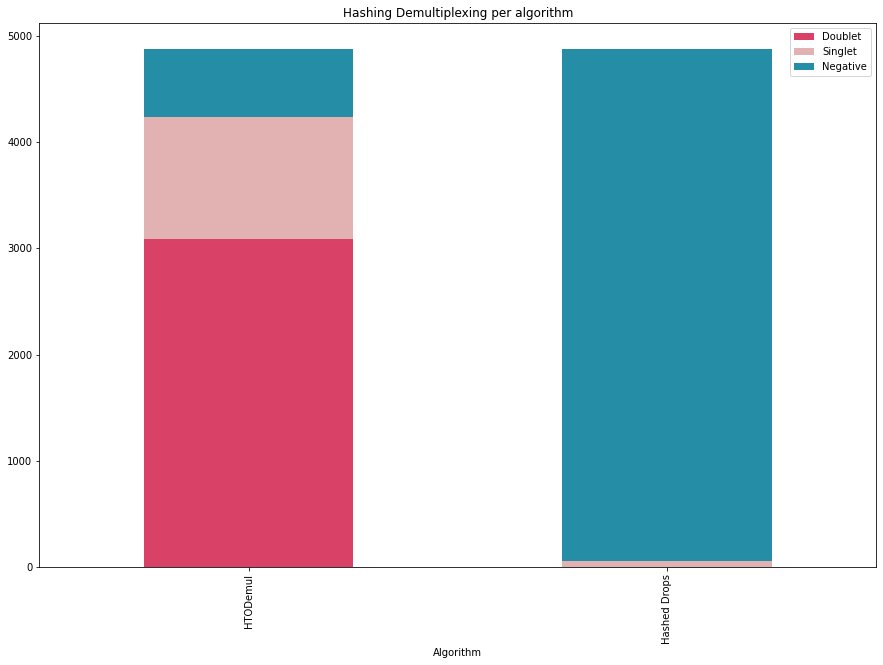

In [20]:
dfObj.plot.bar(x='Algorithm', stacked=True,color=["#DA4167","#E2B1B1","#258EA6"], title='Hashing Demultiplexing per algorithm',figsize=(15, 10))
